## Deep Neural Network Sequential Model On CIFAR10 Small Images Dataset

#### About the Dataset

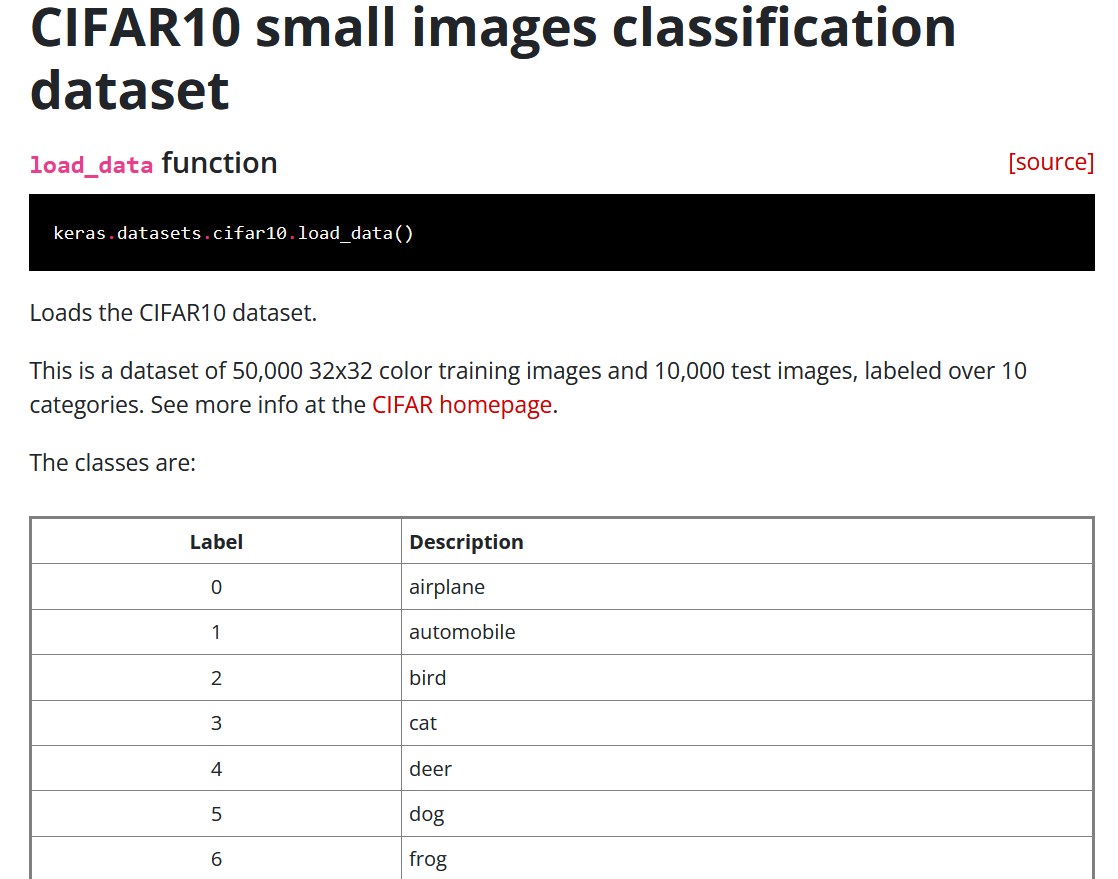

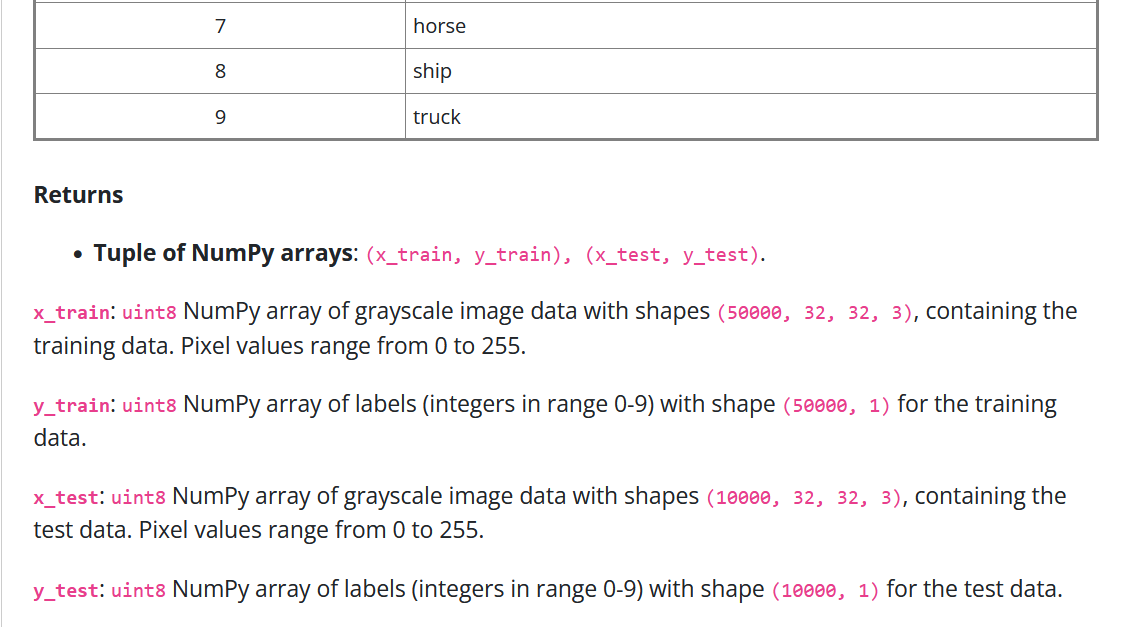

### Data Dictionary : 

#### The classes are :

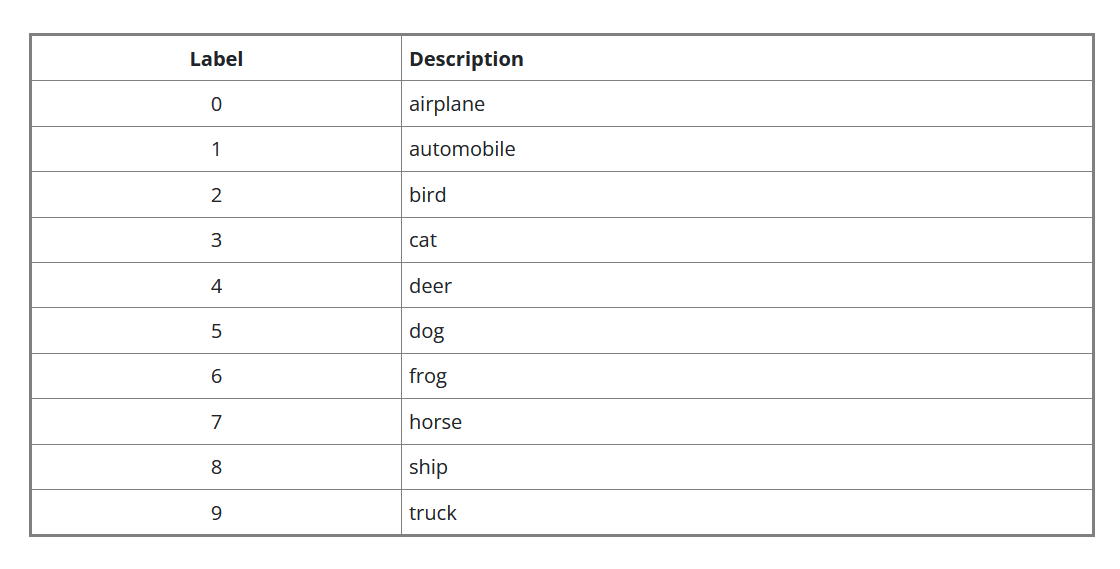

#### Import basic packages

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense , BatchNormalization , Flatten , Dropout
from keras import Sequential
import warnings
warnings.filterwarnings('ignore')

#### Import Inbuilt Dataset from keras

In [2]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.cifar10.load_data()

In [3]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


#### Insights : Total images are 60000. from 60000 images  , 50000 images are for training model and 10000 images for testing model

#### We will check how digits images look like

###### Import visualization library

In [4]:
import matplotlib.pyplot as plt

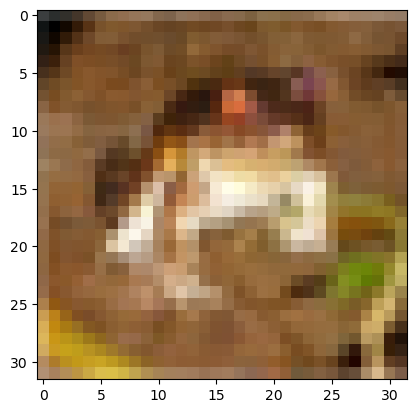

In [5]:
plt.imshow(x_train[0])
plt.show()

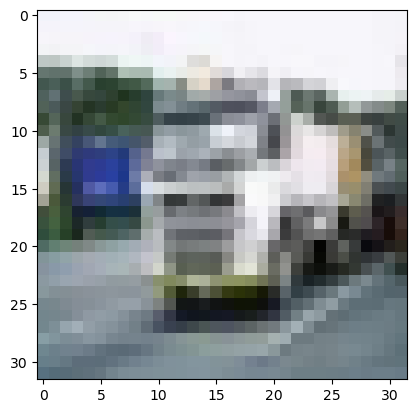

In [6]:
plt.imshow(x_train[1000])
plt.show()

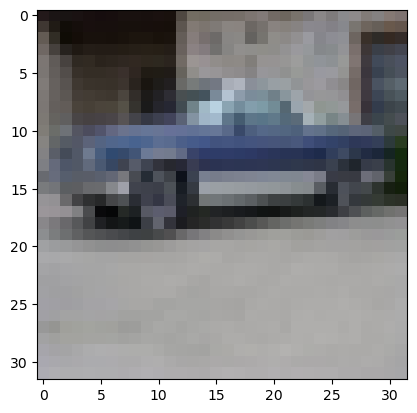

In [7]:
plt.imshow(x_train[10000])
plt.show()

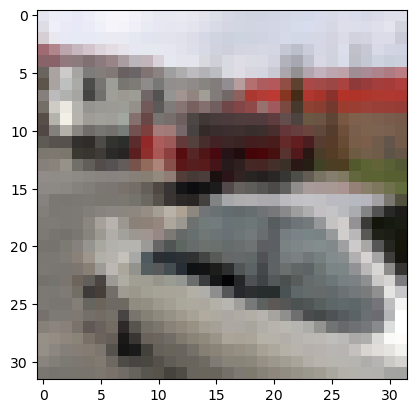

In [8]:
plt.imshow(x_train[49999])
plt.show()

### Feature Scaling

#### In image dataset , we always doing feature scaling by normalization only.

##### Image exist between 0 to 255 . If we divide 0/255 then it became 0 and 255/255 it became 1 only. after this range exist between 0 to 1 only. i.e. normalization

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#### Insights : Data get scaled between 0 to 1 only.

#### Visualization plot of multiple images of training data

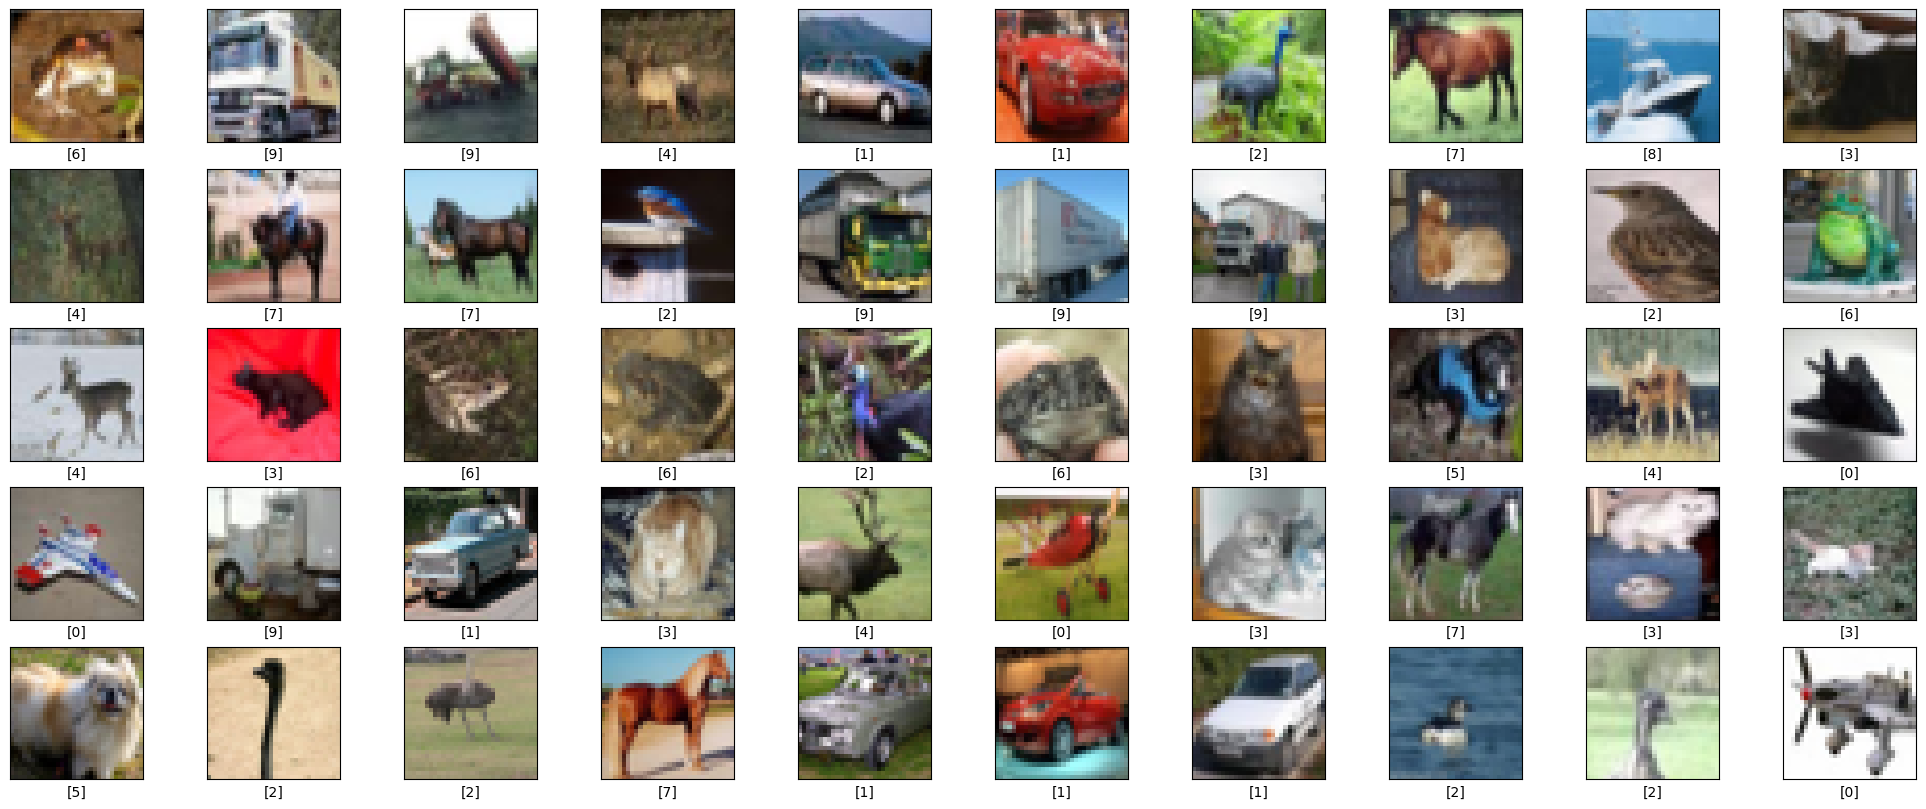

In [10]:
plt.figure(figsize = (25 ,10))
for image in range(50):
    
    plt.subplot(5 , 10 , image + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[image])
    plt.xlabel(y_train[image])
    
plt.show()

#### Visulization of multiple images of testing

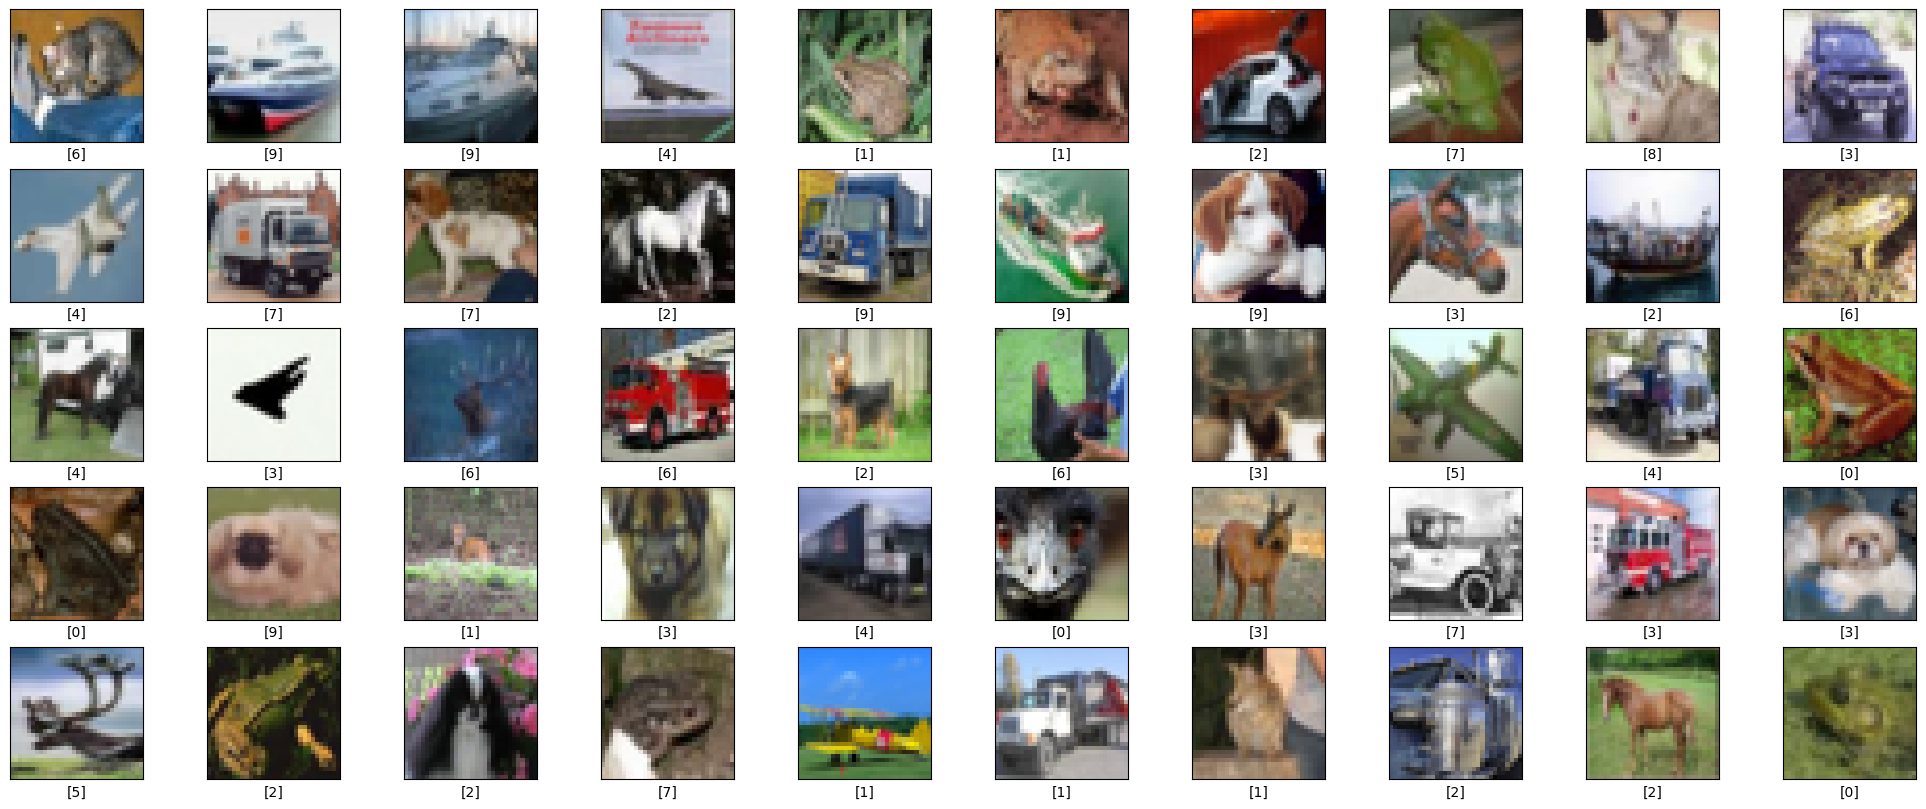

In [11]:
plt.figure(figsize = (25 , 10))
for image in range(50):
    
    plt.subplot(5 , 10 , image + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[image])
    plt.xlabel(y_train[image])
plt.show()

### Building Multilayer Perceptron Model or Deep Neural Network Model

In [12]:
DNN = Sequential()

#### This data is 3 dimensional data . so we need to convert 3 dimensional data into 1 dimensional data . by Faltten , we will do this.

##### We just need to give input shape 

In [13]:
DNN.add(Flatten(input_shape = (32 , 32, 3)))

#### 1st hidden layer

In [14]:
DNN.add(Dense(units = 64 ,  activation = 'relu' , ))

#### We can use Batchnormalization or Dropout here after each hidden layer

In [15]:
#DNN.add(BatchNormalization())
#DNN.add(Dropout(0.25))

#### 2nd hidden layer

In [16]:
DNN.add(Dense(units = 32 , activation = 'relu'))

In [17]:
#DNN.add(BatchNormalization())
#DNN.add(Dropout(0.30))

#### 3rd hidden layer

In [18]:
DNN.add(Dense(units = 16 , activation = 'relu'))

In [19]:
#DNN.add(BatchNormalization())
#DNN.add(Dropout(0.50))

#### Output Layer

In [20]:
DNN.add(Dense(units = 10 , activation = 'softmax'))

##### Insights : In target variable , it contains 10 classes

#### Oprational Parameters of sequential architecture 

In [21]:
DNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,450 (779.10 KB)

 Trainable params: 199,450 (779.10 KB)

 Non-trainable params: 0 (0.00 B)

#### Data after 1D is 3072   i.e.(32 * 32 * 3)

#### Operational Parameters are (3072 * 64 + 64) + (64 * 32 + 32) + (32 * 16 + 16) + (16 * 10 + 10) = 199450

#### Compile the model

In [22]:
DNN.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

#### Fit the model

In [23]:
history = DNN.fit(x_train , y_train , validation_data = (x_test , y_test) , epochs = 100 ,batch_size = 32)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.1834 - loss: 2.1428 - val_accuracy: 0.2908 - val_loss: 1.8840
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3165 - loss: 1.8486 - val_accuracy: 0.3586 - val_loss: 1.7529
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3538 - loss: 1.7655 - val_accuracy: 0.3729 - val_loss: 1.7299
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3753 - loss: 1.7180 - val_accuracy: 0.3695 - val_loss: 1.7174
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3916 - loss: 1.6769 - val_accuracy: 0.3824 - val_loss: 1.7129
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4040 - loss: 1.6379 - val_accuracy: 0.4180 - val_loss: 1.6084
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4169 - loss: 1.6126 - val_accuracy: 0.4255 - val_loss: 1.6012
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4190 - l

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4852 - loss: 1.4195 - val_accuracy: 0.4426 - val_loss: 1.5557
Epoch 51/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4916 - loss: 1.4141 - val_accuracy: 0.4506 - val_loss: 1.5231
Epoch 52/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4936 - loss: 1.4026 - val_accuracy: 0.4542 - val_loss: 1.5204
Epoch 53/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4878 - loss: 1.4127 - val_accuracy: 0.4453 - val_loss: 1.5397
Epoch 54/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4921 - loss: 1.4037 - val_accuracy: 0.4524 - val_loss: 1.5262
Epoch 55/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4910 - loss: 1.4116 - val_accuracy: 0.4419 - val_loss: 1.5309
Epoch 56/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4931 - loss: 1.4041 - val_accuracy: 0.4512 - val_loss: 1.5321
Epoch 57/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4891 - loss: 1.40

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5040 - loss: 1.3580 - val_accuracy: 0.4564 - val_loss: 1.5300
Epoch 100/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.5073 - loss: 1.3573 - val_accuracy: 0.4552 - val_loss: 1.5315


#### Calulate Prediction Output

In [24]:
y_train_pred = DNN.predict(x_train)
y_test_pred = DNN.predict(x_test)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


#### We calculate prediction output but this is softmax loss function . It give more than one possibility . we want consider that possibility as output which contains highest probability

In [25]:
y_train_pred = y_train_pred.reshape(-1 , 1)
y_test_pred  = y_test_pred.reshape(-1 , 1)

y_train_pred = y_train_pred.argmax(axis = 1)
y_test_pred = y_test_pred.argmax(axis = 1)

In [26]:
print(y_test_pred)

[0 0 0 ... 0 0 0]


#### Performance Metrics

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
# print('Training Accuracy (Accuracy) :' , accuracy_score(y_train , y_train_pred))

# print('Testing Accuracy (Val_accuracy) :' , accuracy_score(y_test , y_test_pred))

#### Visualization of Accuracies

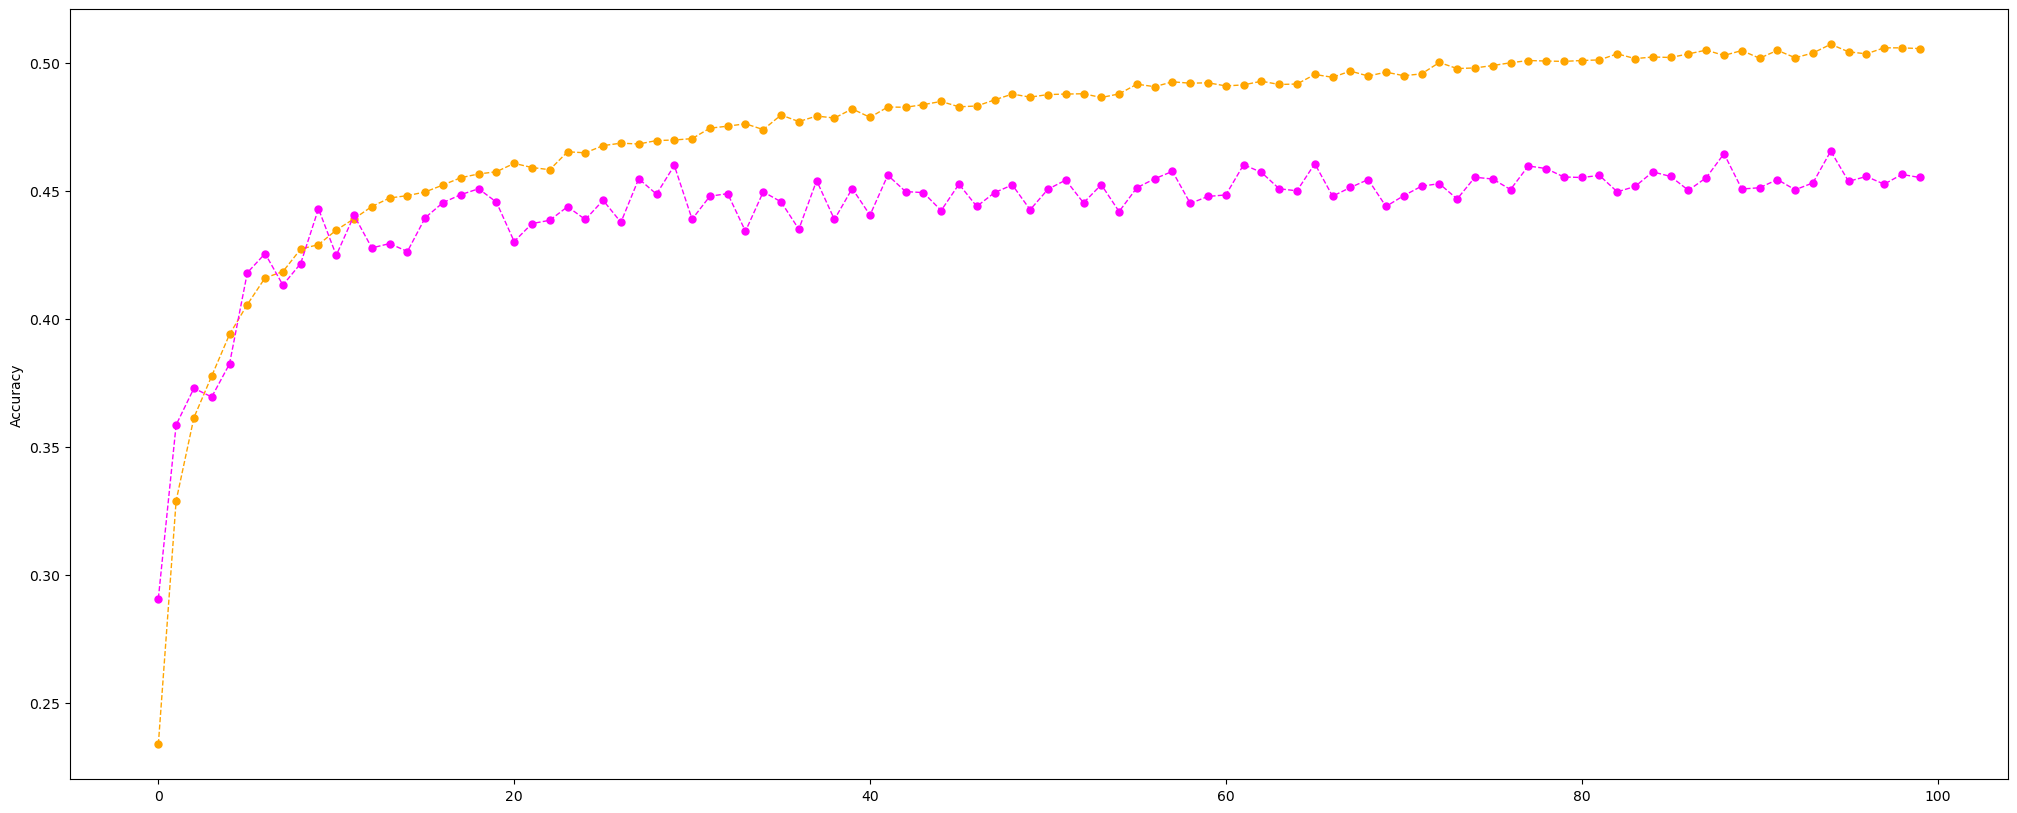

In [29]:
plt.figure(figsize = (25 , 10))
plt.plot(history.history['accuracy'] ,color='orange', marker='o',
         linestyle='dashed',linewidth=1, markersize=5 )
plt.plot(history.history['val_accuracy'] ,color='magenta', marker='o',
         linestyle='dashed',linewidth=1, markersize=5 )
plt.ylabel('Accuracy')
plt.show()

#### visualization of Loss 

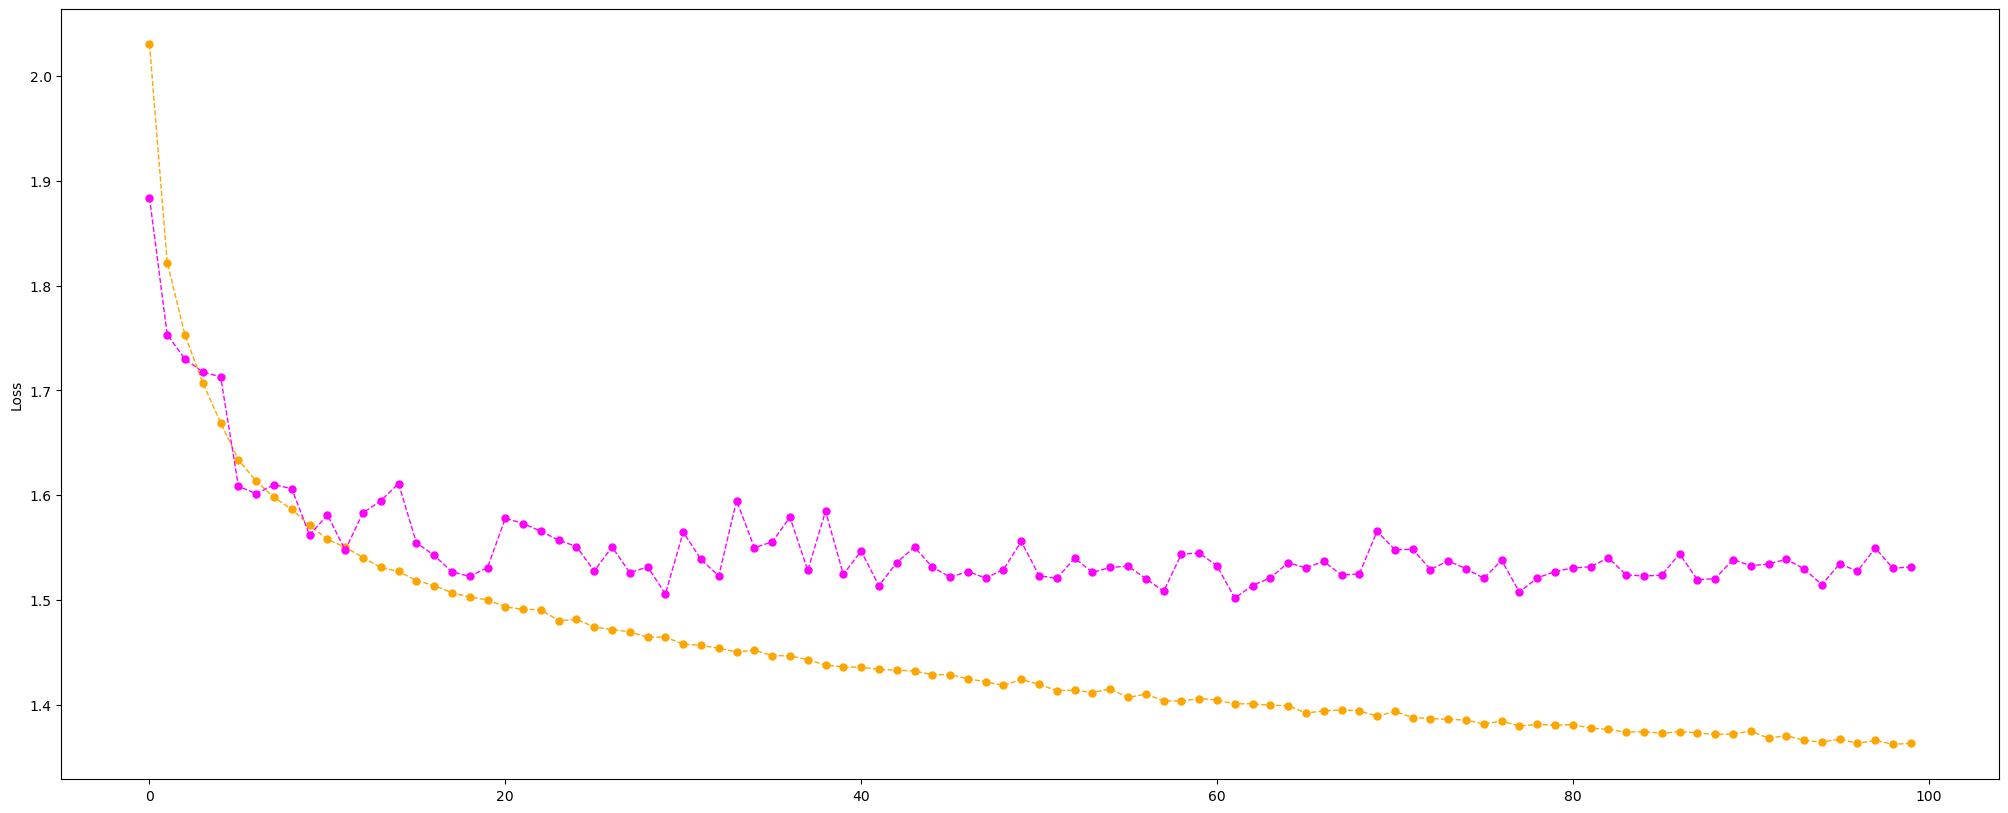

In [30]:
plt.figure(figsize = (25 , 10))
plt.plot(history.history['loss'] , color='orange', marker='o',
         linestyle='dashed',linewidth=1, markersize=5)
plt.plot(history.history['val_loss'] , color='magenta', marker='o',
         linestyle='dashed',linewidth=1, markersize=5)
plt.ylabel('Loss')
plt.show()